### Example on Necessary and Sufficiency for Containment 

We investigate zonotope in V-polytope containment. First, we import `numpy` and `pypolycontain`.

In [1]:
import pypolycontain as pp
import numpy as np

Import mathematical program with Gurobi solver from pydrake. 
**Warning:** Here we assume you have Gurobi solver installed with Drake's python bindings. Otherwise, replace Gurobi with a different solver. For instance, SCS solver comes with Drake by default.

In [2]:
import pydrake.solvers.mathematicalprogram as MP
# use Gurobi solver
import pydrake.solvers.gurobi as Gurobi_drake
gurobi_solver=Gurobi_drake.GurobiSolver()
license = gurobi_solver.AcquireLicense()

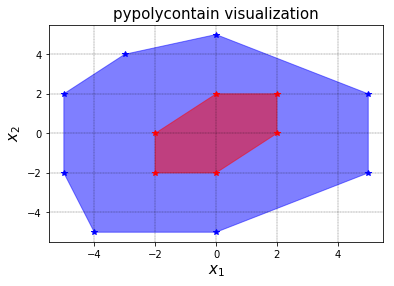

In [3]:
import matplotlib.pyplot as plt
V=[(0,-5),(5,-2),(5,2),(0,5),(-3,4),(-5,2),(-5,-2),(-4,-5)]
G=np.array([[1,0,1],[0,1,1]]).reshape(2,3)
V_circumbody=pp.V_polytope([np.array(v).reshape(2,1) for v in V])
circumbody=pp.to_AH_polytope(V_circumbody)
circumbody.color='blue'
Z_inbody=pp.zonotope(np.zeros((2,1)),G,color='red')
pp.visualize([circumbody,Z_inbody],show_vertices=True)

### Optimization
Now we solve the following optimization problem

In [15]:
pp.containment.extreme_rays_for_containment(circumbody)
s_n,K={},circumbody.dim_complement
for i in range(-1,K+1):
    prog=MP.MathematicalProgram()
    s=prog.NewContinuousVariables(1,"s")
    Z_s=pp.zonotope(Z_inbody.x,Z_inbody.G*s)
    prog.AddLinearCost(-np.array([1]),np.array([0]),s)
    pp.subset(prog,Z_s,circumbody,k=i)
    result=gurobi_solver.Solve(prog,None,None)
    if result.is_success():
        print("subset test successfull")
        s_n[i]=result.GetSolution(s)
        print(i,"s=",s_n[i])
    else:
        print("not a subset") 

subset test successfull
-1 s= [1.51515152]
subset test successfull
0 s= [1.5625]
subset test successfull
1 s= [1.5625]
subset test successfull
2 s= [1.5625]
subset test successfull
3 s= [1.5625]
subset test successfull
4 s= [1.55815768]
subset test successfull
5 s= [1.51515152]


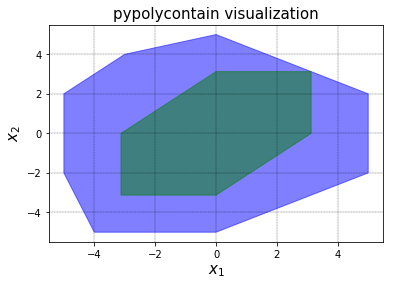

In [5]:
pp.visualize([circumbody,pp.zonotope(Z_inbody.x,Z_inbody.G*(s_n[0]))])

Text(0.5,1,'Smaller Values Are More Conservative')

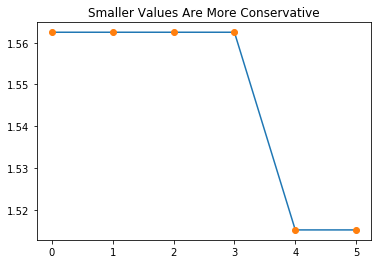

In [6]:
import matplotlib.pyplot as plt
plt.plot(range(K+1),[s_n[i] for i in range(K+1)])
plt.plot(range(K+1),[s_n[i] for i in range(K+1)],'o')
plt.title("Smaller Values Are More Conservative")

In [7]:
for i in range(-1,N+1):
    Theta=pp.extreme_rays_for_containment(circumbody,N=i)
    print(i,Theta.shape)

NameError: name 'N' is not defined